In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import GridSearchCV
import multiprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import shapiro

%config Completer.use_jedi = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import datasets

In [2]:
#Import Dataset 
Dataset_training = pd.read_csv("train_v9rqX0R.csv" , sep=",")
Dataset_test = pd.read_csv("test_AbJTz2l.csv" , sep=",")

#Observo
print(Dataset_training.shape)
print(Dataset_test.shape)

(8523, 12)
(5681, 11)


In [3]:
Dataset_training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
Dataset_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Look at the type of data

In [5]:
Dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
Dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


All variables are in correct format 

## Missing values

In [7]:
#Datos entrenamiento 

#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [8]:
#Outlet_Size is categorical(mode)
#Item_Weight is numerical(median)
#training
col_numer = ["Item_Weight"]
Dataset_training[col_numer] = Dataset_training.groupby("Outlet_Location_Type")[col_numer].transform(lambda x: x.fillna(x.median()))


col_categ = ["Outlet_Size"]
Dataset_training[col_categ] = Dataset_training.groupby("Outlet_Location_Type")[col_categ].transform(lambda x: x.fillna(x.mode()[0]))




In [9]:
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_training.isnull().sum().sort_values(ascending=False)
percent = (Dataset_training.isnull().sum()/Dataset_training.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


In [10]:
#test set 
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Outlet_Size,1606,0.282697
Item_Weight,976,0.171801
Item_Identifier,0,0.000000
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Location_Type,0,0.000000


In [11]:
col_numer = ["Item_Weight"]
Dataset_test[col_numer] = Dataset_test.groupby("Outlet_Location_Type")[col_numer].transform(lambda x: x.fillna(x.median()))


col_categ = ["Outlet_Size"]
Dataset_test[col_categ] = Dataset_test.groupby("Outlet_Location_Type")[col_categ].transform(lambda x: x.fillna(x.mode()[0]))



In [12]:
#test set 
#Missing values por porcentaje de valores faltantes que tienen 
total = Dataset_test.isnull().sum().sort_values(ascending=False)
percent = (Dataset_test.isnull().sum()/Dataset_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


## Dependant variable analysis

### Normal 

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

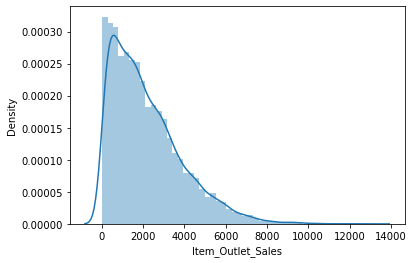

In [13]:
sns.distplot(Dataset_training['Item_Outlet_Sales'])

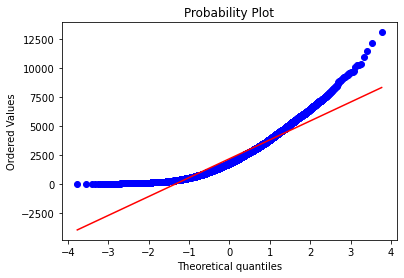

In [14]:
QQplot = plt.figure()
res = stats.probplot(Dataset_training['Item_Outlet_Sales'], plot=plt)
plt.show()

In [15]:
from scipy.stats import skew, kurtosis
print("skewness:" + str(round(skew(Dataset_training['Item_Outlet_Sales']),3)))
print("Kurtosis:" + str(round(kurtosis(Dataset_training['Item_Outlet_Sales']),3)))

skewness:1.177
Kurtosis:1.614


### Log transformation

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

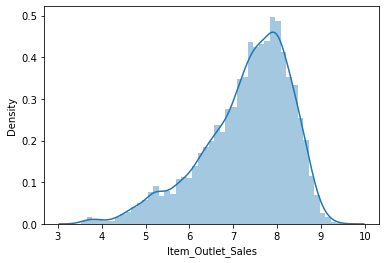

In [16]:
#Log transformation
variable = np.log1p(Dataset_training.Item_Outlet_Sales)
sns.distplot(variable)

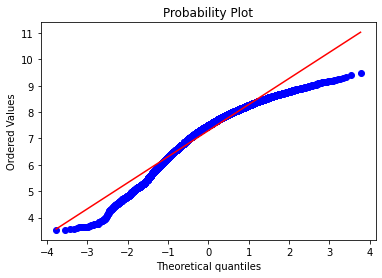

In [17]:
QQplot = plt.figure()
res = stats.probplot(variable, plot=plt)
plt.show()

In [18]:
from scipy.stats import skew, kurtosis
print("skewness:" + str(round(skew(variable),3)))
print("Kurtosis:" + str(round(kurtosis(variable),3)))

skewness:-0.882
Kurtosis:0.532


### Boxcox transformation

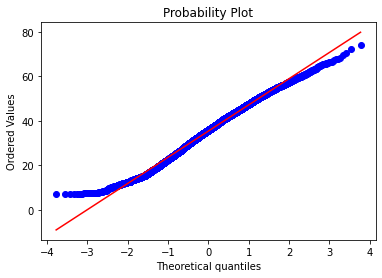

In [19]:
from scipy.stats import boxcox 
#boxcox
transformed_data, best_lambda = boxcox(Dataset_training['Item_Outlet_Sales']) 
QQplot = plt.figure()
res = stats.probplot(transformed_data, plot=plt)
plt.show()

In [20]:
print("skewness:" + str(round(skew(transformed_data),3)))
print("Kurtosis:" + str(round(kurtosis(transformed_data),3)))

skewness:-0.075
Kurtosis:-0.538


<AxesSubplot:ylabel='Density'>

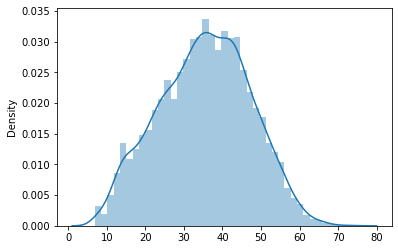

In [21]:
sns.distplot(transformed_data)

 I will state with boxcox

In [22]:
Dataset_training["Item_Outlet_Sales"]=transformed_data
Dataset_training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,47.007885
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,20.958294
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,37.964893
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,25.485930
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,42.145847
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,22.794301
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,30.712790
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,36.195026


## Transforming years 

In [23]:
def AgeYearOld(year): 
    return year.apply(lambda x: 0 if x==0 else (2022 - x))

In [24]:
Dataset_training.Outlet_Establishment_Year = AgeYearOld(Dataset_training.Outlet_Establishment_Year)
Dataset_training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,23,Medium,Tier 1,Supermarket Type1,47.007885
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,13,Medium,Tier 3,Supermarket Type2,20.958294
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,23,Medium,Tier 1,Supermarket Type1,37.964893
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,24,Medium,Tier 3,Grocery Store,25.485930
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,35,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,35,High,Tier 3,Supermarket Type1,42.145847
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,20,Small,Tier 2,Supermarket Type1,22.794301
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,18,Small,Tier 2,Supermarket Type1,30.712790
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,13,Medium,Tier 3,Supermarket Type2,36.195026


In [25]:
#test set 
Dataset_test.Outlet_Establishment_Year = AgeYearOld(Dataset_test.Outlet_Establishment_Year)
Dataset_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,23,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,15,Small,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,24,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,15,Small,Tier 2,Supermarket Type1
4,FDY38,12.300,Regular,0.118599,Dairy,234.2300,OUT027,37,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,25,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,13,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,20,Small,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,15,Small,Tier 2,Supermarket Type1


## Correlation matrix

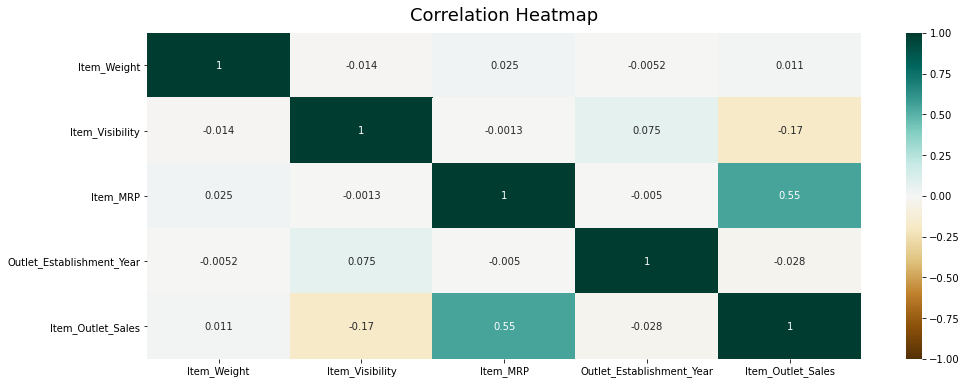

In [26]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Dataset_training.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

Item_Weight, Outlet_Establishment_Year influence very low

## Standarization and Scaling of numerical features

In [27]:
from sklearn.preprocessing import StandardScaler 

X_features = Dataset_training.drop(["Item_Outlet_Sales"], axis=1)
#Hago standarization and scaling 
Colnombres = X_features.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_training[Colnombres] =sc.fit_transform(Dataset_training[Colnombres])

Dataset_training

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,-0.832915,Low Fat,-0.970732,Dairy,1.747454,OUT049,-0.139541,Medium,Tier 1,Supermarket Type1,47.007885
1,DRC01,-1.632599,Regular,-0.908111,Soft Drinks,-1.489023,OUT018,-1.334103,Medium,Tier 3,Supermarket Type2,20.958294
2,FDN15,1.107148,Low Fat,-0.956917,Meat,0.010040,OUT049,-0.139541,Medium,Tier 1,Supermarket Type1,37.964893
3,FDX07,1.509356,Regular,-1.281758,Fruits and Vegetables,0.660050,OUT010,-0.020085,Medium,Tier 3,Grocery Store,25.485930
4,NCD19,-0.920454,Low Fat,-1.281758,Household,-1.399220,OUT013,1.293934,High,Tier 3,Supermarket Type1,28.660858
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,-1.409018,Low Fat,-0.181193,Snack Foods,1.180783,OUT013,1.293934,High,Tier 3,Supermarket Type1,42.145847
8519,FDS36,-1.050580,Regular,-0.371154,Baking Goods,-0.527301,OUT045,-0.497909,Small,Tier 2,Supermarket Type1,22.794301
8520,NCJ29,-0.525344,Low Fat,-0.599784,Health and Hygiene,-0.897208,OUT035,-0.736822,Small,Tier 2,Supermarket Type1,30.712790
8521,FDN46,-1.327394,Regular,1.532880,Snack Foods,-0.607977,OUT018,-1.334103,Medium,Tier 3,Supermarket Type2,36.195026


In [28]:
from sklearn.preprocessing import StandardScaler 
#test
#Hago standarization and scaling 
Colnombres = X_features.select_dtypes(exclude=["object","category"]).columns
sc = StandardScaler()
Dataset_test[Colnombres] =sc.fit_transform(Dataset_test[Colnombres])

Dataset_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,1.911661,Low Fat,-1.134077,Snack Foods,-0.536555,OUT049,-0.139891,Medium,Tier 1,Supermarket Type1
1,FDW14,-1.019671,reg,-0.531850,Dairy,-0.868937,OUT017,-1.095512,Small,Tier 2,Supermarket Type1
2,NCN55,0.463654,Low Fat,0.661316,Others,1.629848,OUT010,-0.020438,Medium,Tier 3,Grocery Store
3,FDQ58,-1.251587,Low Fat,-0.981416,Snack Foods,0.226697,OUT017,-1.095512,Small,Tier 2,Supermarket Type1
4,FDY38,-0.077877,Regular,1.032540,Dairy,1.508110,OUT027,1.532446,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,-0.501684,Regular,-1.018333,Snack Foods,0.004727,OUT046,0.099015,Small,Tier 1,Supermarket Type1
5677,FDD47,-1.184484,Regular,1.508493,Starchy Foods,0.455014,OUT018,-1.334417,Medium,Tier 3,Supermarket Type2
5678,NCO17,-0.619408,Low Fat,0.153074,Health and Hygiene,-0.360485,OUT045,-0.498248,Small,Tier 2,Supermarket Type1
5679,FDJ26,0.628468,Regular,-1.281690,Canned,1.190844,OUT017,-1.095512,Small,Tier 2,Supermarket Type1


## Binarization of qualitative features

In [29]:
Dependant_variable=Dataset_training["Item_Outlet_Sales"]
Dataset_training=Dataset_training.drop(["Item_Identifier","Item_Outlet_Sales","Outlet_Identifier","Outlet_Establishment_Year","Item_Weight"],axis=1)
Dataset_test=Dataset_test.drop(["Item_Identifier","Outlet_Identifier","Outlet_Establishment_Year","Item_Weight"],axis=1)

In [30]:
Dataset_training

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,-0.970732,Dairy,1.747454,Medium,Tier 1,Supermarket Type1
1,Regular,-0.908111,Soft Drinks,-1.489023,Medium,Tier 3,Supermarket Type2
2,Low Fat,-0.956917,Meat,0.010040,Medium,Tier 1,Supermarket Type1
3,Regular,-1.281758,Fruits and Vegetables,0.660050,Medium,Tier 3,Grocery Store
4,Low Fat,-1.281758,Household,-1.399220,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,Low Fat,-0.181193,Snack Foods,1.180783,High,Tier 3,Supermarket Type1
8519,Regular,-0.371154,Baking Goods,-0.527301,Small,Tier 2,Supermarket Type1
8520,Low Fat,-0.599784,Health and Hygiene,-0.897208,Small,Tier 2,Supermarket Type1
8521,Regular,1.532880,Snack Foods,-0.607977,Medium,Tier 3,Supermarket Type2


In [31]:
Dataset_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,-1.134077,Snack Foods,-0.536555,Medium,Tier 1,Supermarket Type1
1,reg,-0.531850,Dairy,-0.868937,Small,Tier 2,Supermarket Type1
2,Low Fat,0.661316,Others,1.629848,Medium,Tier 3,Grocery Store
3,Low Fat,-0.981416,Snack Foods,0.226697,Small,Tier 2,Supermarket Type1
4,Regular,1.032540,Dairy,1.508110,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,Regular,-1.018333,Snack Foods,0.004727,Small,Tier 1,Supermarket Type1
5677,Regular,1.508493,Starchy Foods,0.455014,Medium,Tier 3,Supermarket Type2
5678,Low Fat,0.153074,Health and Hygiene,-0.360485,Small,Tier 2,Supermarket Type1
5679,Regular,-1.281690,Canned,1.190844,Small,Tier 2,Supermarket Type1


In [32]:
Dataset_training= pd.get_dummies(Dataset_training)
Dataset_training

,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.970732,1.747454,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-0.908111,-1.489023,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.956917,0.010040,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,-1.281758,0.660050,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,-1.281758,-1.399220,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.181193,1.180783,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,-0.371154,-0.527301,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8520,-0.599784,-0.897208,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,1.532880,-0.607977,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [33]:
Dataset_test= pd.get_dummies(Dataset_test)
Dataset_test

,Item_Visibility,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-1.134077,-0.536555,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-0.531850,-0.868937,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,0.661316,1.629848,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,-0.981416,0.226697,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,1.032540,1.508110,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,-1.018333,0.004727,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,1.508493,0.455014,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,0.153074,-0.360485,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5679,-1.281690,1.190844,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


 It appear both have the same columns

## Intersection check

In [34]:
train_cols = Dataset_training.columns
test_cols = Dataset_test.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

train_not_test

Index([], dtype='object')

## Cross validation function

In [35]:
from sklearn.model_selection import RepeatedKFold
def cross_validation(X,Y,model):
    cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
    log_y = np.log(Y)
    score = cross_val_score(model, X, log_y, cv=cv, scoring="neg_mean_squared_error")
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)
regressor_Gradient_boost.fit(Dataset_training,Dependant_variable)

cross_validation(Dataset_training,Dependant_variable,regressor_Gradient_boost)

0.20041090633988792

In [37]:
from sklearn.ensemble import RandomForestRegressor

regressor_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_forest.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_forest)

0.2211988617796622

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor_decision_tree = DecisionTreeRegressor(random_state = 0)
regressor_decision_tree.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_decision_tree)

0.28653737940183843

In [39]:
from sklearn.svm import SVR
regressor_SVR = SVR(kernel = 'rbf')
regressor_SVR.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_SVR)

0.20844415258446974

In [40]:
from sklearn import linear_model

regressor_lasso = linear_model.Lasso(random_state=0)
regressor_lasso.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_lasso)

0.39231648482779063

In [41]:
regressor_Ridge = linear_model.Ridge(random_state=0)
regressor_Ridge.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_Ridge)

0.20745912485432064

In [42]:
from sklearn.neighbors import KNeighborsRegressor

regressor_KNN = KNeighborsRegressor()
regressor_KNN.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_KNN)

0.22718166286363964

In [43]:
regressor_Ridge_Bayesian = linear_model.BayesianRidge()
regressor_Ridge_Bayesian.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_Ridge_Bayesian)

0.20745643884529902

In [44]:
import xgboost as xgb

regressor_Gradient_Xboost = xgb.XGBRegressor() 
regressor_Gradient_Xboost.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_Gradient_Xboost)

0.211665947044305

In [45]:
from lightgbm import LGBMRegressor

regressor_LGBM= LGBMRegressor(random_state=0)
regressor_LGBM.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_LGBM)

0.20280150062379118

In [46]:
from sklearn.linear_model import ElasticNet

regressor_ElasticNet = ElasticNet(random_state=0)
regressor_ElasticNet.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_ElasticNet)

0.39231648482779063

In [47]:
from sklearn.linear_model import SGDRegressor

regressor_SGDR = SGDRegressor(random_state=0)
regressor_SGDR.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,regressor_SGDR)

0.21321266026845284

In [ ]:
#Best performance GradientBoost, LGBMRegressor, Ridge, SVR

## Stacking to see if it is better

In [48]:
from sklearn.ensemble import StackingRegressor

regressor_LGBM= LGBMRegressor(random_state=0)

regressor_Ridge = linear_model.Ridge(random_state=0)

regressor_SVR = SVR(kernel = 'rbf')

estimators = [('regressor_LGBM', regressor_LGBM),('regressor_Ridge', regressor_Ridge),("regressor_SVR",regressor_SVR)]

stack_reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor(random_state=0))

stack_reg.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,stack_reg)

0.2012543731338752

In [64]:
from sklearn.ensemble import StackingRegressor
#Trying another final estimator
regressor_LGBM= LGBMRegressor(random_state=0)

regressor_Ridge = linear_model.Ridge(random_state=0)

regressor_SVR = SVR(kernel = 'rbf')

regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)

estimators = [('regressor_LGBM', regressor_LGBM),('regressor_SVR', regressor_SVR),("regressor_Gradient_boost",regressor_Gradient_boost)]

stack_reg = StackingRegressor(estimators=estimators,final_estimator=regressor_Ridge)

stack_reg.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,stack_reg)

0.2003361066040712

In [60]:
from sklearn.ensemble import StackingRegressor
#Trying another final estimator
regressor_LGBM= LGBMRegressor(random_state=0)

regressor_Ridge = linear_model.Ridge(random_state=0)

regressor_SVR = SVR(kernel = 'rbf')

regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)

estimators = [('regressor_Ridge', regressor_Ridge),('regressor_SVR', regressor_SVR),("regressor_Gradient_boost",regressor_Gradient_boost)]

stack_reg = StackingRegressor(estimators=estimators,final_estimator=regressor_LGBM)

stack_reg.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,stack_reg)

0.20407647086014497

## IDEAL ONE

In [68]:
from sklearn.ensemble import StackingRegressor
#Trying another final estimator
regressor_LGBM= LGBMRegressor(random_state=0)

regressor_Ridge = linear_model.Ridge(random_state=0)

regressor_SVR = SVR(kernel = 'rbf')

regressor_Gradient_boost = GradientBoostingRegressor(random_state=0)

estimators = [('regressor_LGBM', regressor_LGBM),('regressor_Ridge', regressor_Ridge),("regressor_Gradient_boost",regressor_Gradient_boost)]

stack_reg = StackingRegressor(estimators=estimators,final_estimator=regressor_SVR)

stack_reg.fit(Dataset_training,Dependant_variable)
cross_validation(Dataset_training,Dependant_variable,stack_reg)
#THE BEST ONE SO FAR

0.2016257293598891

In [69]:
Prediction=stack_reg.predict(Dataset_test)
Prediction

array([35.08628741, 31.69409126, 23.05808743, ..., 35.97508761,
       46.91147374, 31.98398534])

In [70]:
#Inverse of boxcox
from scipy.special import boxcox, inv_boxcox
Original = inv_boxcox(Prediction, best_lambda)
Original

array([1698.48664385, 1296.48111319,  565.72763184, ..., 1815.77896808,
       3714.34492025, 1328.09882618])

In [71]:
Sample = pd.read_csv("sample_submission_8RXa3c6.csv")
Sample["Item_Outlet_Sales"]=Original
Sample.to_csv('submission_8.csv', index=False)

In [40]:
Sample

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1573.070023
1,FDW14,OUT017,1262.863704
2,NCN55,OUT010,528.040872
3,FDQ58,OUT017,2294.813315
4,FDY38,OUT027,5780.192718
...,...,...,...
5676,FDB58,OUT046,2086.358308
5677,FDD47,OUT018,2212.502617
5678,NCO17,OUT045,1760.839885
5679,FDJ26,OUT017,3312.485766
